In [117]:
import numpy as np
import matplotlib.pyplot as plt


# wolfram classes

Class 1: Homogeneous state
Class 2: Periodic
Class 3: Chaotic
Class 4: Complex

In [118]:
class1 = [0,8,32,40,128,136,160,168]
class2 = [1,2,3,4,5,6,7,9,10,11,12,13,14,15,19,23,24,25,26,27,28,29,33,34,35,36,37,38,42,43,44,46,50,51,56,57,58,62,72,73,74,76,77,78,94,104,108,130,132,134,138,140,142,152,154,156,162,164,170,172,178,184,200,204,232]
class3 = [18,22,30,45,60,90,105,122,126,146,150]
class4 = [41,54,106,110]

# Rules for the two worlds and their output patterns


In [119]:
# rule for world1
world1 = 115
# rule for world2
world2 = 90

In [120]:
output_pattern1 = [int(x) for x in np.binary_repr(world1,width =8)]
output_pattern2 = [int(x) for x in np.binary_repr(world2,width =8)]

In [121]:
input_pattern = np.zeros([8,3]) #all binary representations 0 to 7
for i in range(8):
    input_pattern[i,:] = [int(x) for x in np.binary_repr(7-i,width = 3)]

# Size of one world

In [122]:
columns = 100
rows = int(columns/2)+1

In [123]:
#world1
canvas1 = np.zeros([rows,columns+2]) 
#seed world1
canvas1[0,int(columns/2)+1] = 1 

#world2
canvas2 = np.zeros([rows,columns+2])

# Pattern generation function

In [124]:
def pattern(canvas,output_pattern,rows,columns):
    for i in np.arange(0,rows-1):
        for j in np.arange(0,columns):
            for k in range(8):
                if np.array_equal(input_pattern[k,:], canvas[i,j:j+3]):
                    canvas[i+1,j+1] = output_pattern[k]
    return canvas

# Entropy Calculation function

In [125]:
def entropy(canvas):
    nblack = np.count_nonzero(canvas)
    ntotal = np.size(canvas)
    nwhite = ntotal-nblack
    pblack = nblack/ntotal
    pwhite = nwhite/ntotal
    
    h = -nblack*pblack*np.log10(pblack) - nwhite*pwhite*np.log10(pwhite)
    h=h/np.log10(2)
    
    return h,pblack,pwhite
    

In [126]:
c1 = pattern(canvas1,output_pattern1,rows,columns)

In [127]:
#seed world2 with last line of world1
canvas2[0,:] = canvas1[rows-1,:]

In [128]:
c2 = pattern(canvas2,output_pattern2,rows,columns)

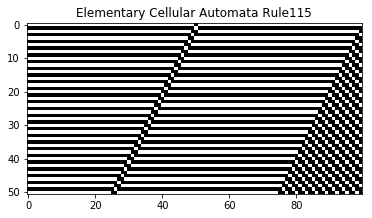

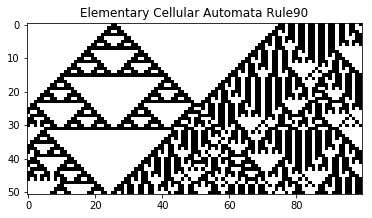

In [129]:
plt.imshow(c1[:,1:columns+1], cmap='Greys')
plt.title("Elementary Cellular Automata Rule{}".format(world1))
plt.show()
plt.imshow(c2[:,1:columns+1], cmap='Greys')
plt.title("Elementary Cellular Automata Rule{}".format(world2))
plt.show()

In [130]:
universe = np.concatenate((c1,c2),axis=0)

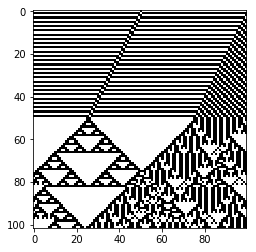

In [131]:
plt.imshow(universe[:,1:columns+1], cmap='Greys')
plt.show()

In [132]:
entropy(c1)

(2600.2105667907467, 0.5080738177623991, 0.49192618223760093)

In [133]:
entropy(c2)

(2429.9882389449695, 0.3808150711264898, 0.6191849288735102)

# Maxwell's Demon - A second rule as a barrier

CA will have various kinds of demons, each of whom do a specific kind of computation based on the preceding generation. Imagine a block of cells with different rule sandwiched between two worlds which follow rule 1.

In [134]:
#world1 with rule1
canvas1 = np.zeros([rows,columns+2]) 
#seed world1
canvas1[0,int(columns/2)+1] = 1 
#pattern generation in world1
c1 = pattern(canvas1,output_pattern1,rows,columns)



# Create demon with n rows

In [135]:
n=20
#world2 with rule2
demon = np.zeros([n,columns+2])
#input to the demon comes from last generation of world1
demon[0,:] = canvas1[rows-1,:]
#Demon computes
c2 = pattern(demon,output_pattern2,n,columns)


Feed Demon into world3 with rule1

In [136]:
#world3 with rule1 again
canvas2 = np.zeros([rows,columns+2]) 
#seed world1 with output of demon
canvas2[0,:] = demon[n-1,:]
#pattern generation in world1
c3 = pattern(canvas2,output_pattern1,rows,columns)


In [137]:
universe = np.concatenate((c1,c2,c3),axis=0)

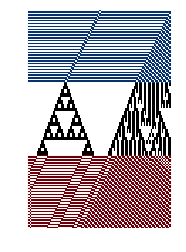

In [138]:
fig, axs = plt.subplots(3,sharex=True,gridspec_kw={'hspace': 0})
b='Blues'
axs[0].imshow(c1, cmap=b)
axs[0].axis('off')
axs[1].imshow(c2,cmap='Greys',aspect=rows/n)
axs[1].axis('off')
axs[2].imshow(c3,cmap='Reds')
axs[2].axis('off')
plt.show()

In [139]:
h1 = entropy(c1)
h2 = entropy(c2)

In [140]:
h1

(2600.2105667907467, 0.5080738177623991, 0.49192618223760093)

In [141]:
h2

(822.3417719666598, 0.29411764705882354, 0.7058823529411765)

# Compute over different combinations of worlds

In [146]:
result_array = np.empty([700,4])
count=0

for world1 in class3:
    for world2 in class2:
        output_pattern1 = [int(x) for x in np.binary_repr(world1,width =8)]
        output_pattern2 = [int(x) for x in np.binary_repr(world2,width =8)]
        #world1
        canvas1 = np.zeros([rows,columns+2]) 
        #seed world1
        canvas1[0,int(columns/2)+1] = 1 
        #create world1
        c1 = pattern(canvas1,output_pattern1,rows,columns)
        
        n=20
        #world2 with rule2
        demon = np.zeros([n,columns+2])
        #input to the demon comes from last generation of world1
        demon[0,:] = canvas1[rows-1,:]
        #Demon computes
        c2 = pattern(demon,output_pattern2,n,columns)


        #world3 with rule1 again
        canvas2 = np.zeros([rows,columns+2]) 
        #seed world1 with output of demon
        canvas2[0,:] = demon[n-1,:]
        #pattern generation in world1
        c3 = pattern(canvas2,output_pattern1,rows,columns)

        
        #create universe
        #universe = np.concatenate((c1,c2,c3),axis=0)
        
        
        #calculate entropy
        h1 = entropy(c1)
        h2 = entropy(c3)
        
        #plot universes
        fig, axs = plt.subplots(3,sharex=True,gridspec_kw={'hspace': 0})
        bcol='Blues'
        rcol='Reds'
        
        if h2>h1:  #entropy increases after demon 
            axs[0].imshow(c1, cmap=bcol)
            axs[0].axis('off')
            axs[1].imshow(c2,cmap='Greys',aspect=rows/n)
            axs[1].axis('off')
            axs[2].imshow(c3,cmap=rcol)
            axs[2].axis('off')
        
        elif h1>h2: #entropy decreases after demon
            axs[0].imshow(c1, cmap=rcol)
            axs[0].axis('off')
            axs[1].imshow(c2,cmap='Greys',aspect=rows/n)
            axs[1].axis('off')
            axs[2].imshow(c3,cmap=bcol)
            axs[2].axis('off')
            
        else:
            axs[0].imshow(c1, cmap='Greys')
            axs[0].axis('off')
            axs[1].imshow(c2,cmap='Greys',aspect=rows/n)
            axs[1].axis('off')
            axs[2].imshow(c3,cmap='Greys')
            axs[2].axis('off')
            
        
        plt.savefig('demon'+str(world2)+'_'+str(world1)+'.png')
        plt.close(fig)

        
                
        result_array[count] = [world1,world2,h1[0],h2[0]]
        count=count+1



C:\Users\debay\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\debay\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


IndexError: index 700 is out of bounds for axis 0 with size 700